In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



<h4>Importing the Dataset</h4>

In [2]:
df = pd.read_csv('dataset/train_FD001.txt',sep=" ",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


<h4>Removing Empty Columns</h4>

In [30]:
cols = [26,27]
df.drop(df.columns[cols],axis=1,inplace=True)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


# RENAMING COLUMNS

In [31]:
index_names = ['unit','time_cycle']
settings = ["setting_"+str(i) for i in range(1,4)]
sensor_names = ['S{}'.format(i) for i in range(1,22)] 
column_names = index_names+settings+sensor_names
old_names = df.columns
df.rename(columns=dict(zip(old_names, column_names)), inplace=True)

In [5]:
df.head()

,unit,time_cycle,setting_1,setting_2,setting_3,S1,S2,S3,S4,S5,...,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


<h4> UNIVARIATE ANALYSIS</h4>


In [9]:
features = ['unit','time_cycle']
df[features].describe()

,unit,time_cycle
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


* There are 100 engines
* Data points = 20361


In [7]:
df[features].groupby('unit').max().describe()

,time_cycle
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


* The Engine that failed the earliest did so at 128 cycles
* The Engine that operated the longest broke down after 362 cycles
* Average Engine breaks down between 199 and 206 cycles


# Engine - Average Life

C:\Users\abhis\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Life of Engines')

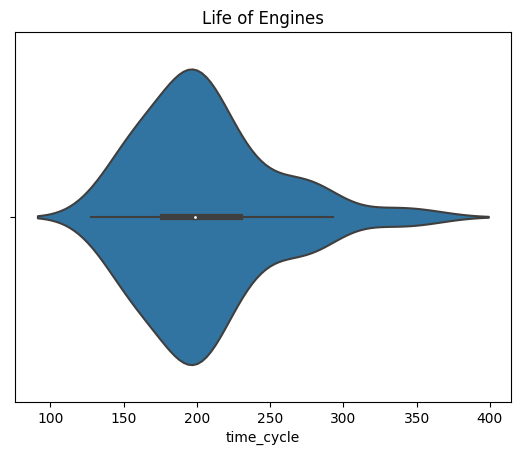

In [7]:
temp_df = df[["unit","time_cycle"]].groupby("unit").max()
sns.violinplot(temp_df.time_cycle)
plt.title("Life of Engines")



Lifespacn of average engine is around 200 cycles.

## Calculating RUL 

In [32]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit")
    max_cycle = grouped_by_unit["time_cycle"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycle"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
  
df = add_remaining_useful_life(df)
df[features+['RUL']].head()

,unit,time_cycle,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


# Check for Null Values

In [10]:
df.isnull().sum()


unit          0
time_cycle    0
setting_1     0
setting_2     0
setting_3     0
S1            0
S2            0
S3            0
S4            0
S5            0
S6            0
S7            0
S8            0
S9            0
S10           0
S11           0
S12           0
S13           0
S14           0
S15           0
S16           0
S17           0
S18           0
S19           0
S20           0
S21           0
RUL           0
dtype: int64

No Null Values

# How Operational Settings impact Time Cycle

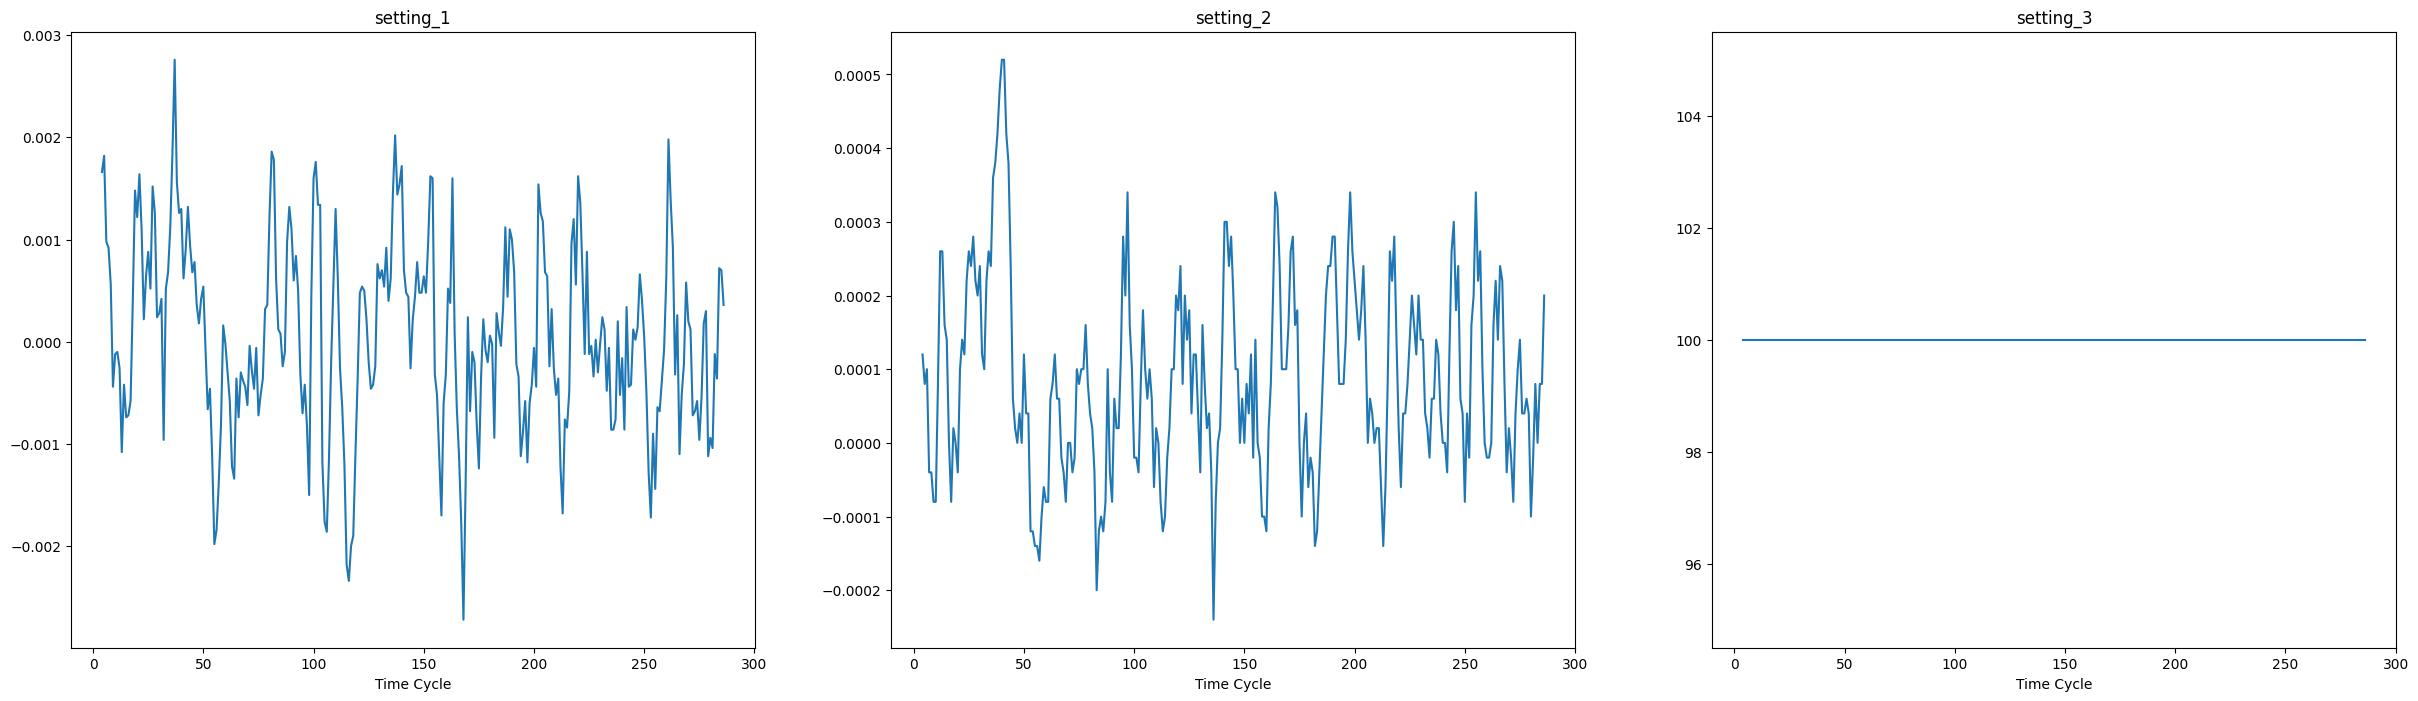

In [34]:
fig,ax=plt.subplots(1,3,figsize=(30,8),sharex='all')
for i in range(0,3):
    df_q = df.query('unit==2').reset_index(drop=True)
    df_q['rolling_avg']= df_q['setting_'+str(i+1)].rolling(window=5).mean()
    df_q['rolling_avg'].plot(kind = 'line',ax=ax[i])
    ax[i].set_title('setting_'+str(i+1))
    ax[i].set_xlabel("Time Cycle")


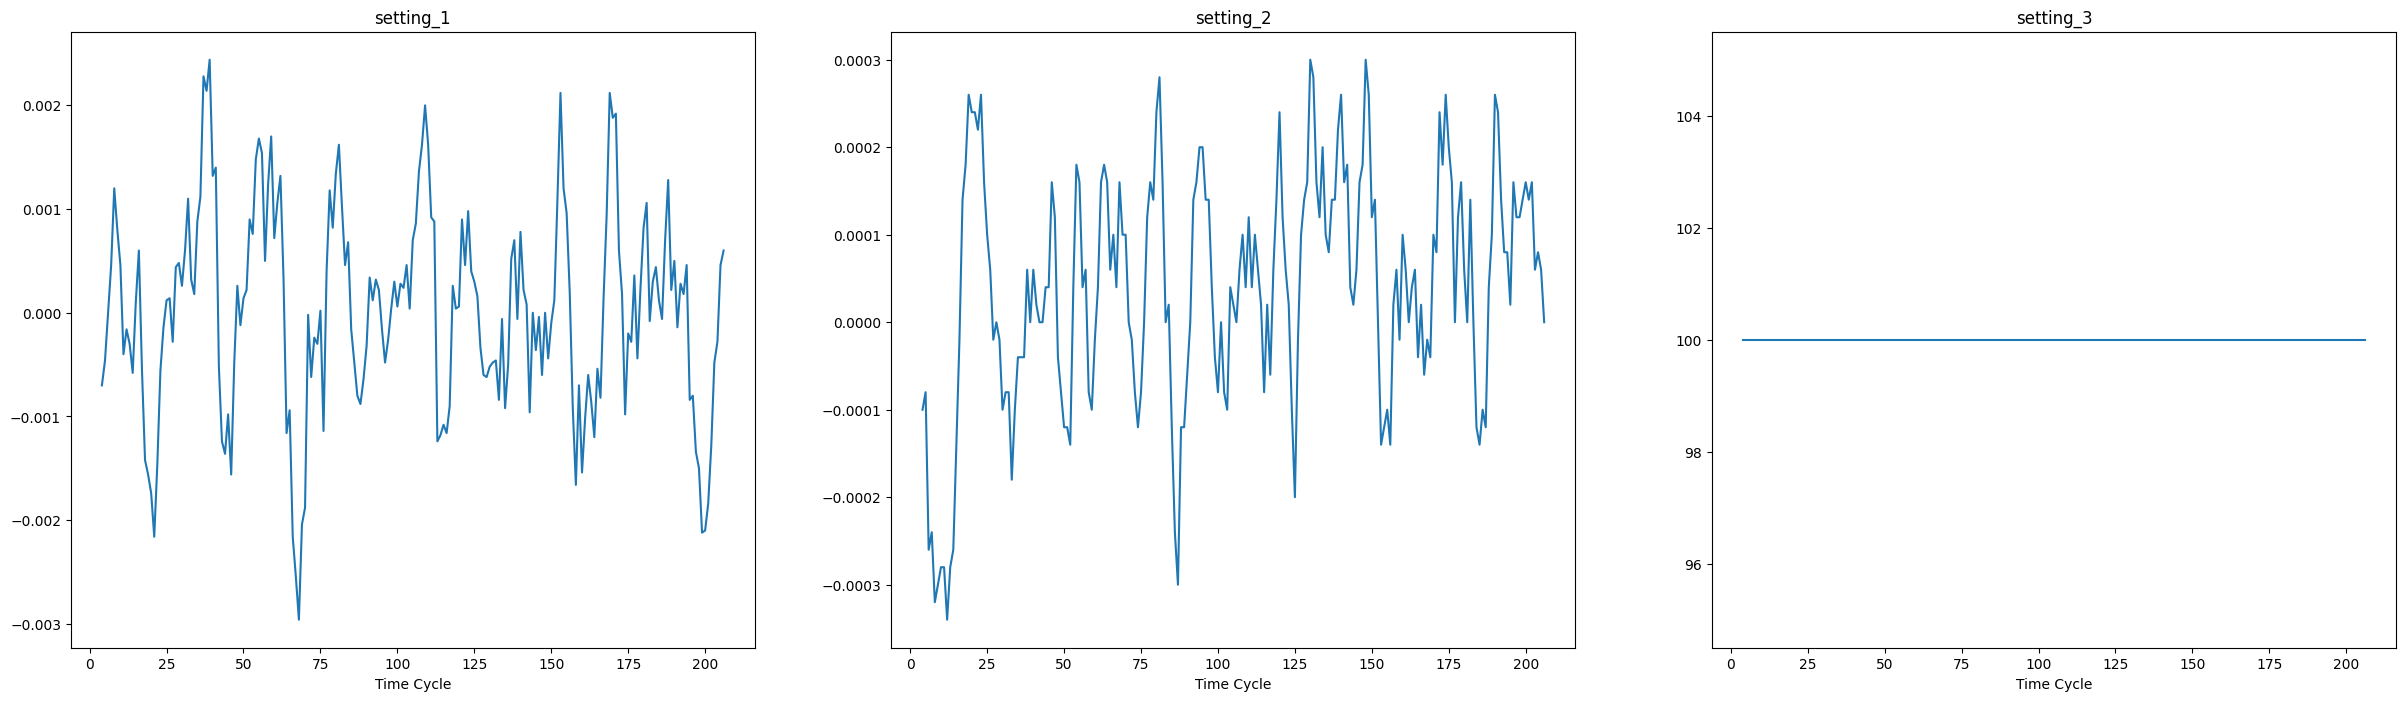

In [35]:
fig,ax=plt.subplots(1,3,figsize=(30,8),sharex='all')
for i in range(0,3):
    df_q = df.query('unit==15').reset_index(drop=True)
    df_q['rolling_avg']= df_q['setting_'+str(i+1)].rolling(window=5).mean()
    df_q['rolling_avg'].plot(kind = 'line',ax=ax[i])
    ax[i].set_title('setting_'+str(i+1))
    ax[i].set_xlabel("Time Cycle")

## Operational Setting vs Sensors

<h3>Setting 1</h3>

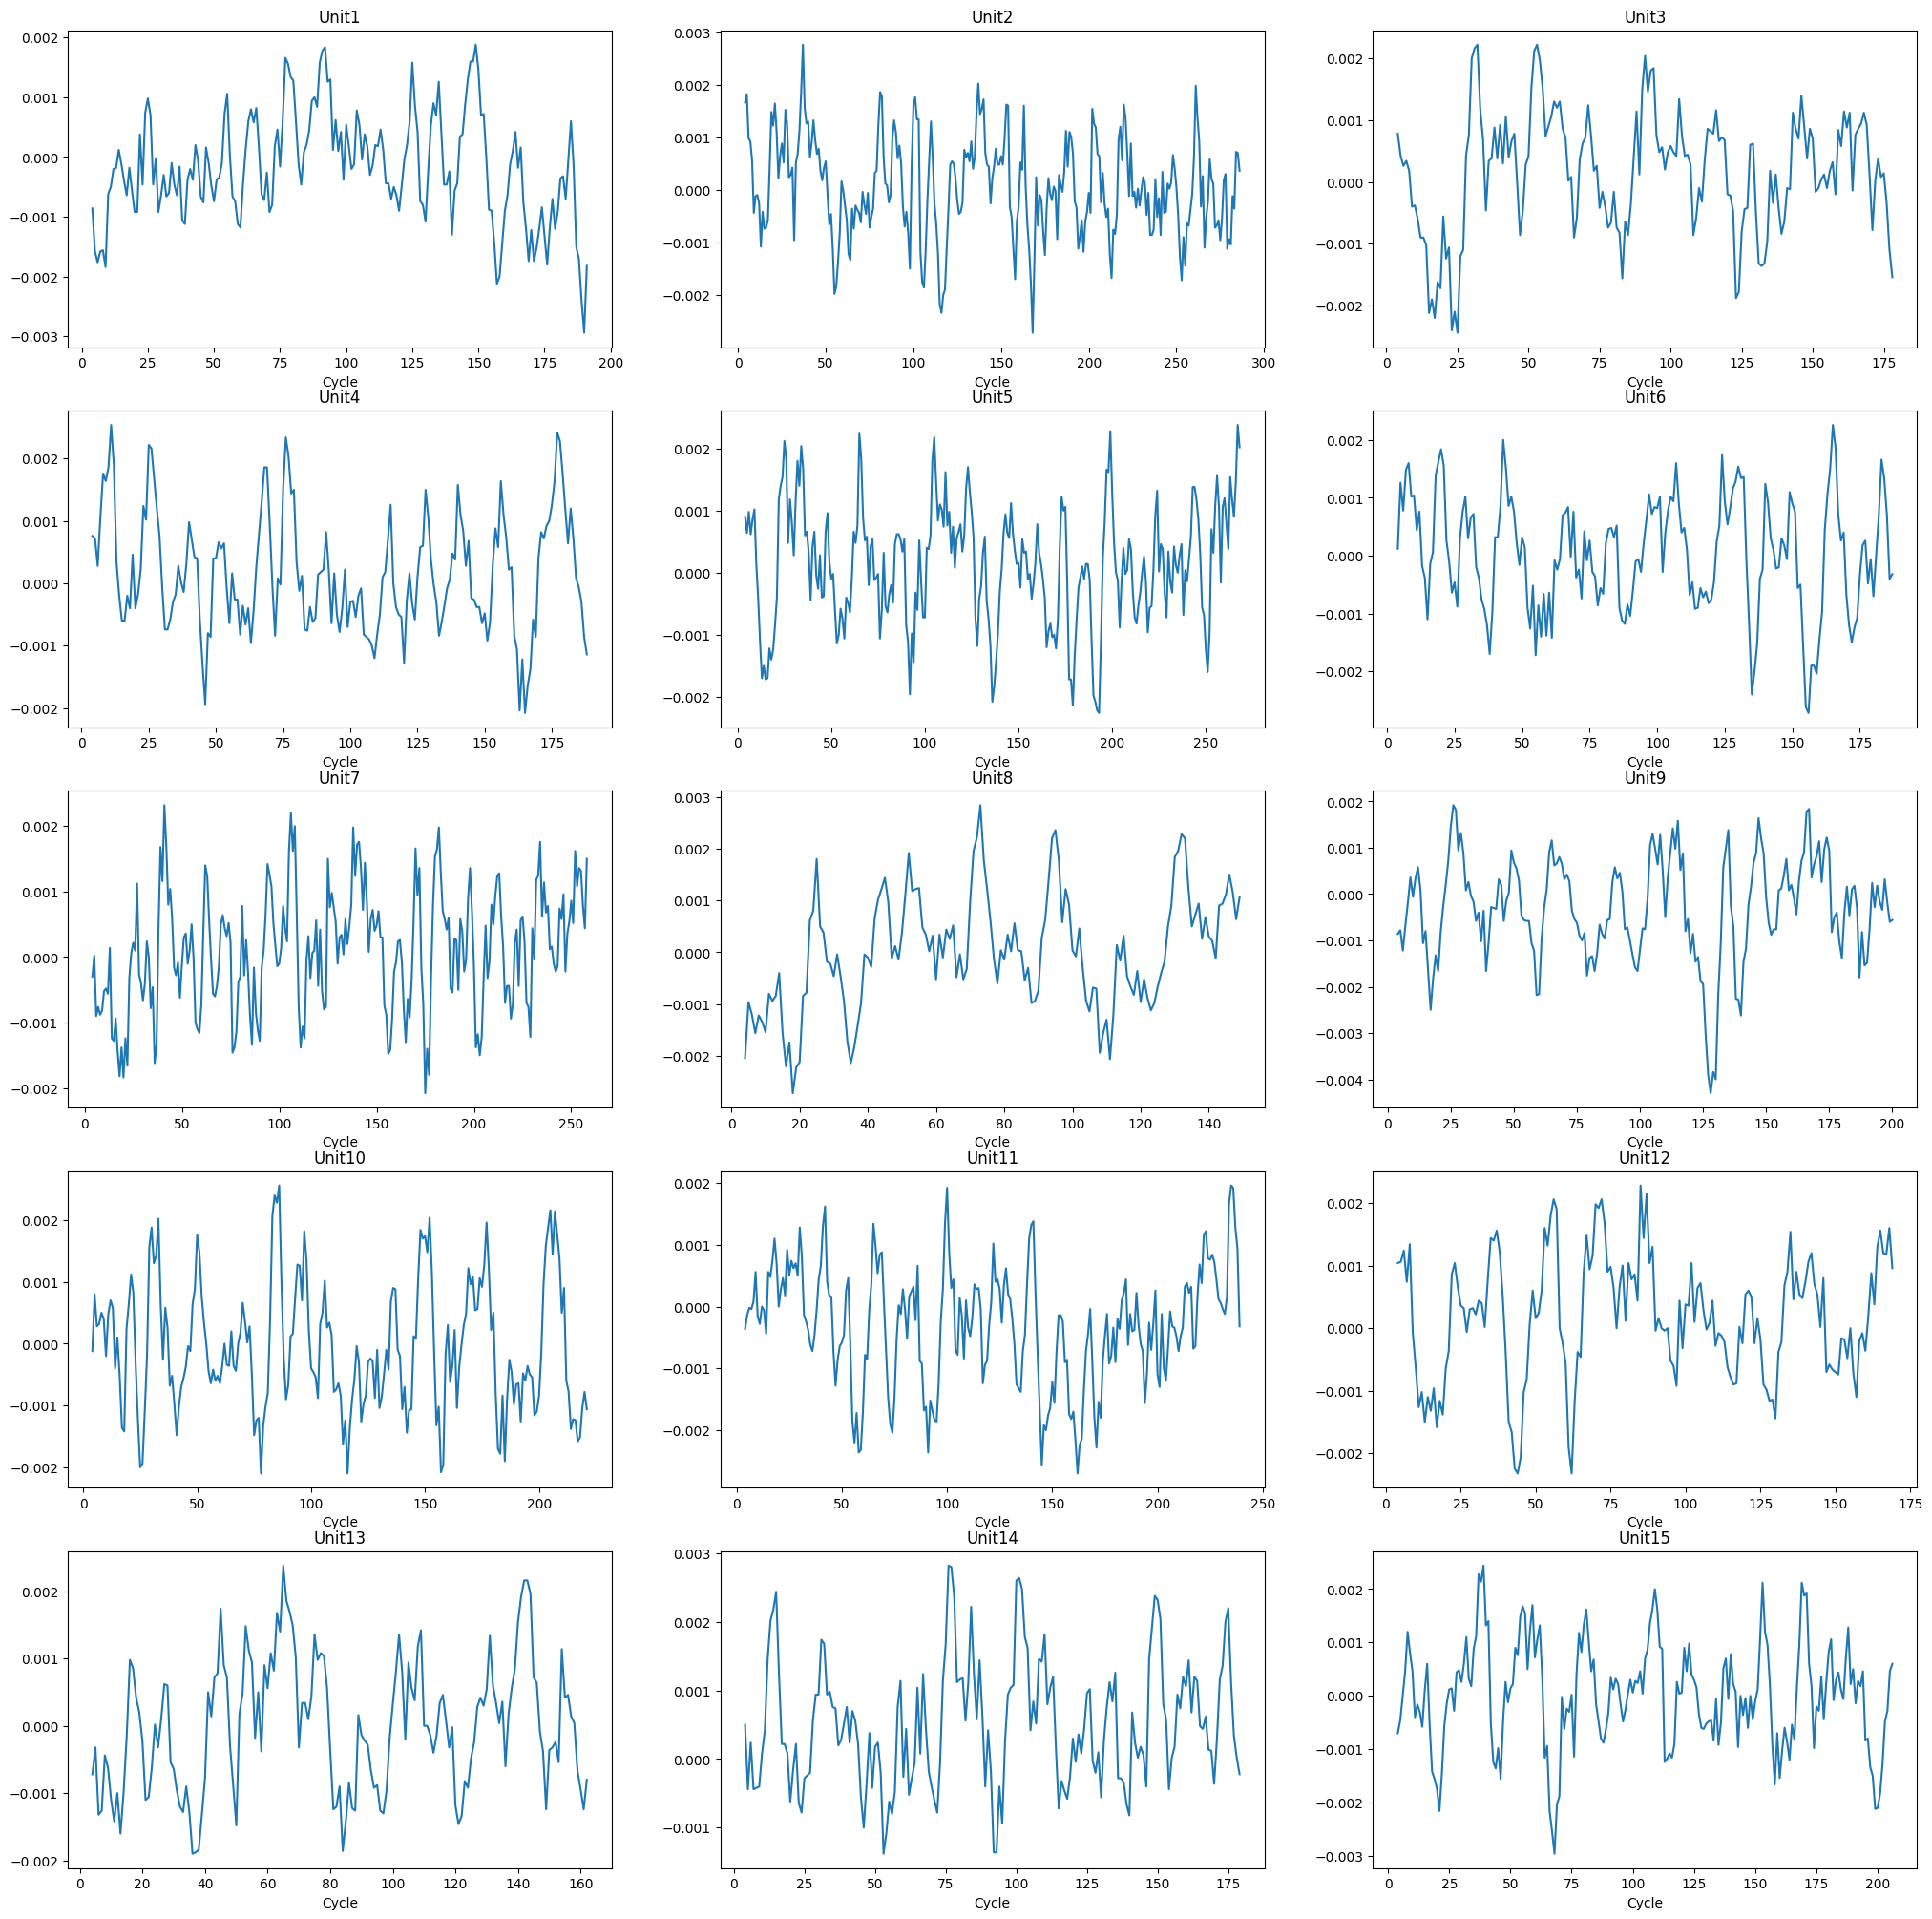

In [11]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (25,25))

ax = axes.ravel()

for i in range(0,15):
    temp = df.setting_1[df.unit == i+1].reset_index(drop = True).rolling(window = 5).mean()
    temp.plot(kind = "line", ax = ax[i])
    ax[i].set_title('Unit'+str(i+1))
    ax[i].set_xlabel("Cycle")

<h3> Setting 2</h3>

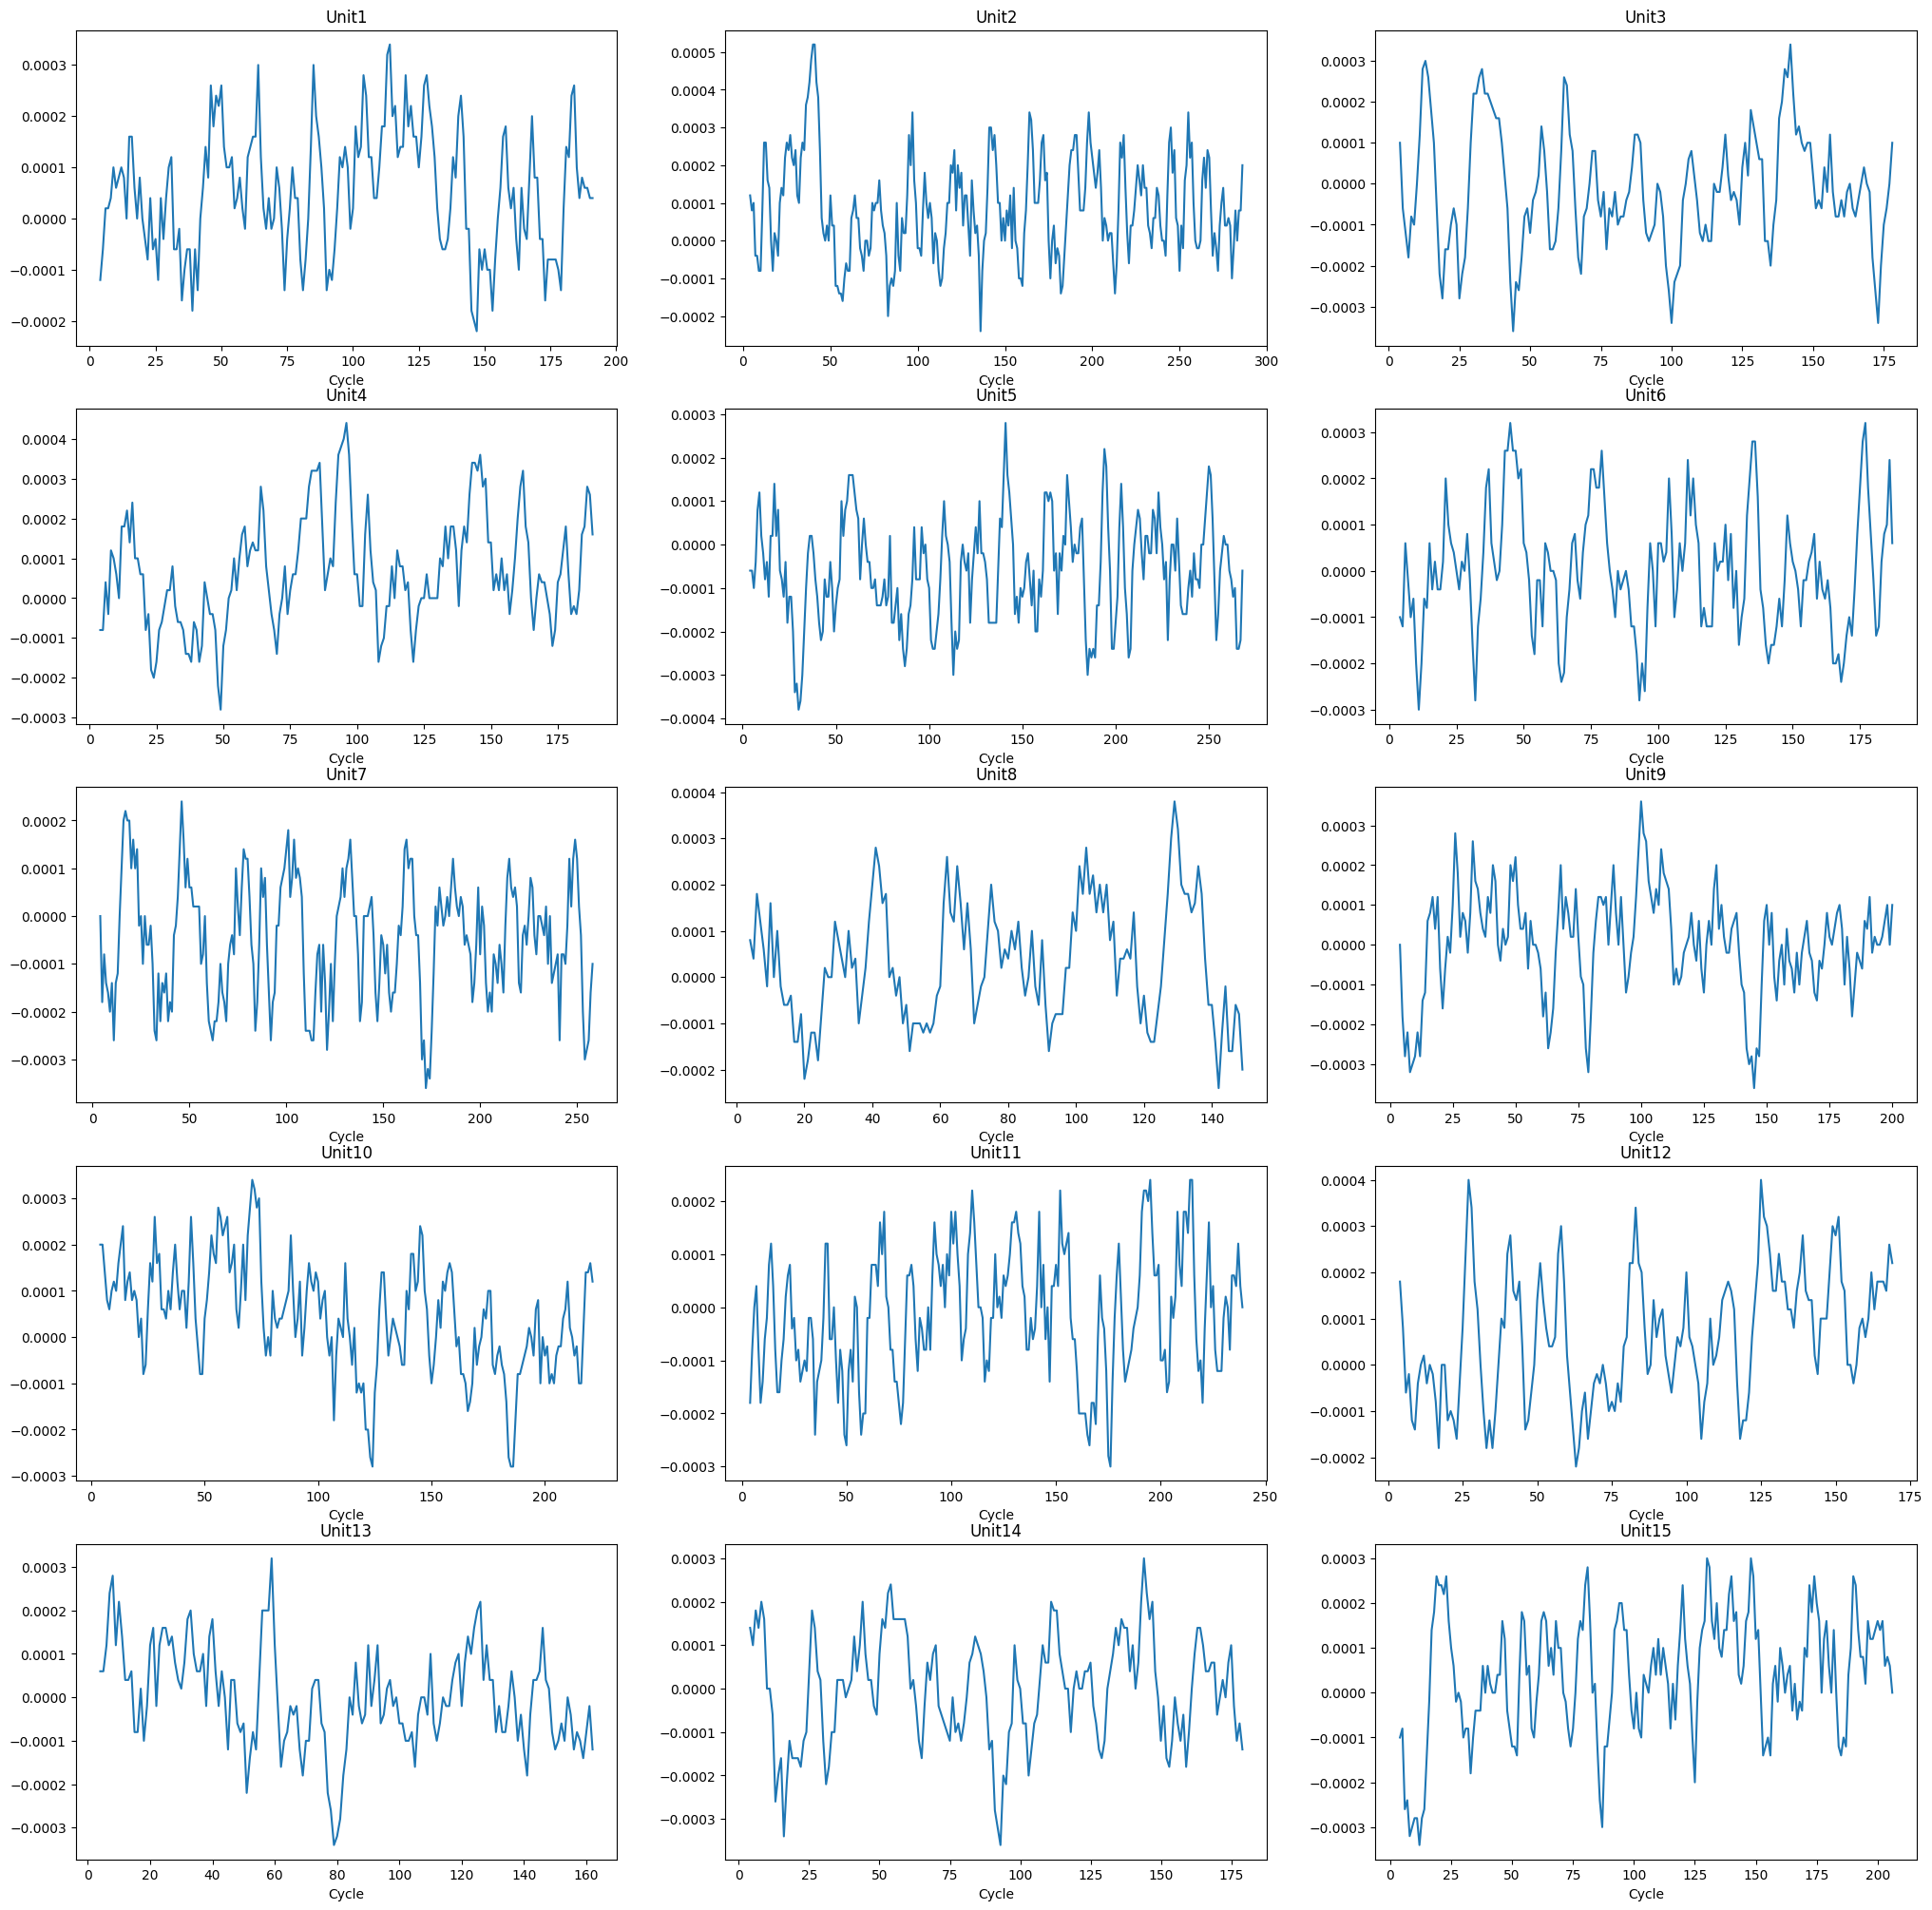

In [12]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (25,25))

ax = axes.ravel()

for i in range(0,15):
    temp = df.setting_2[df.unit == i+1].reset_index(drop = True).rolling(window = 5).mean()
    temp.plot(kind = "line", ax = ax[i])
    ax[i].set_title('Unit'+str(i+1))
    ax[i].set_xlabel("Cycle")

<h3> Setting 3</h3>

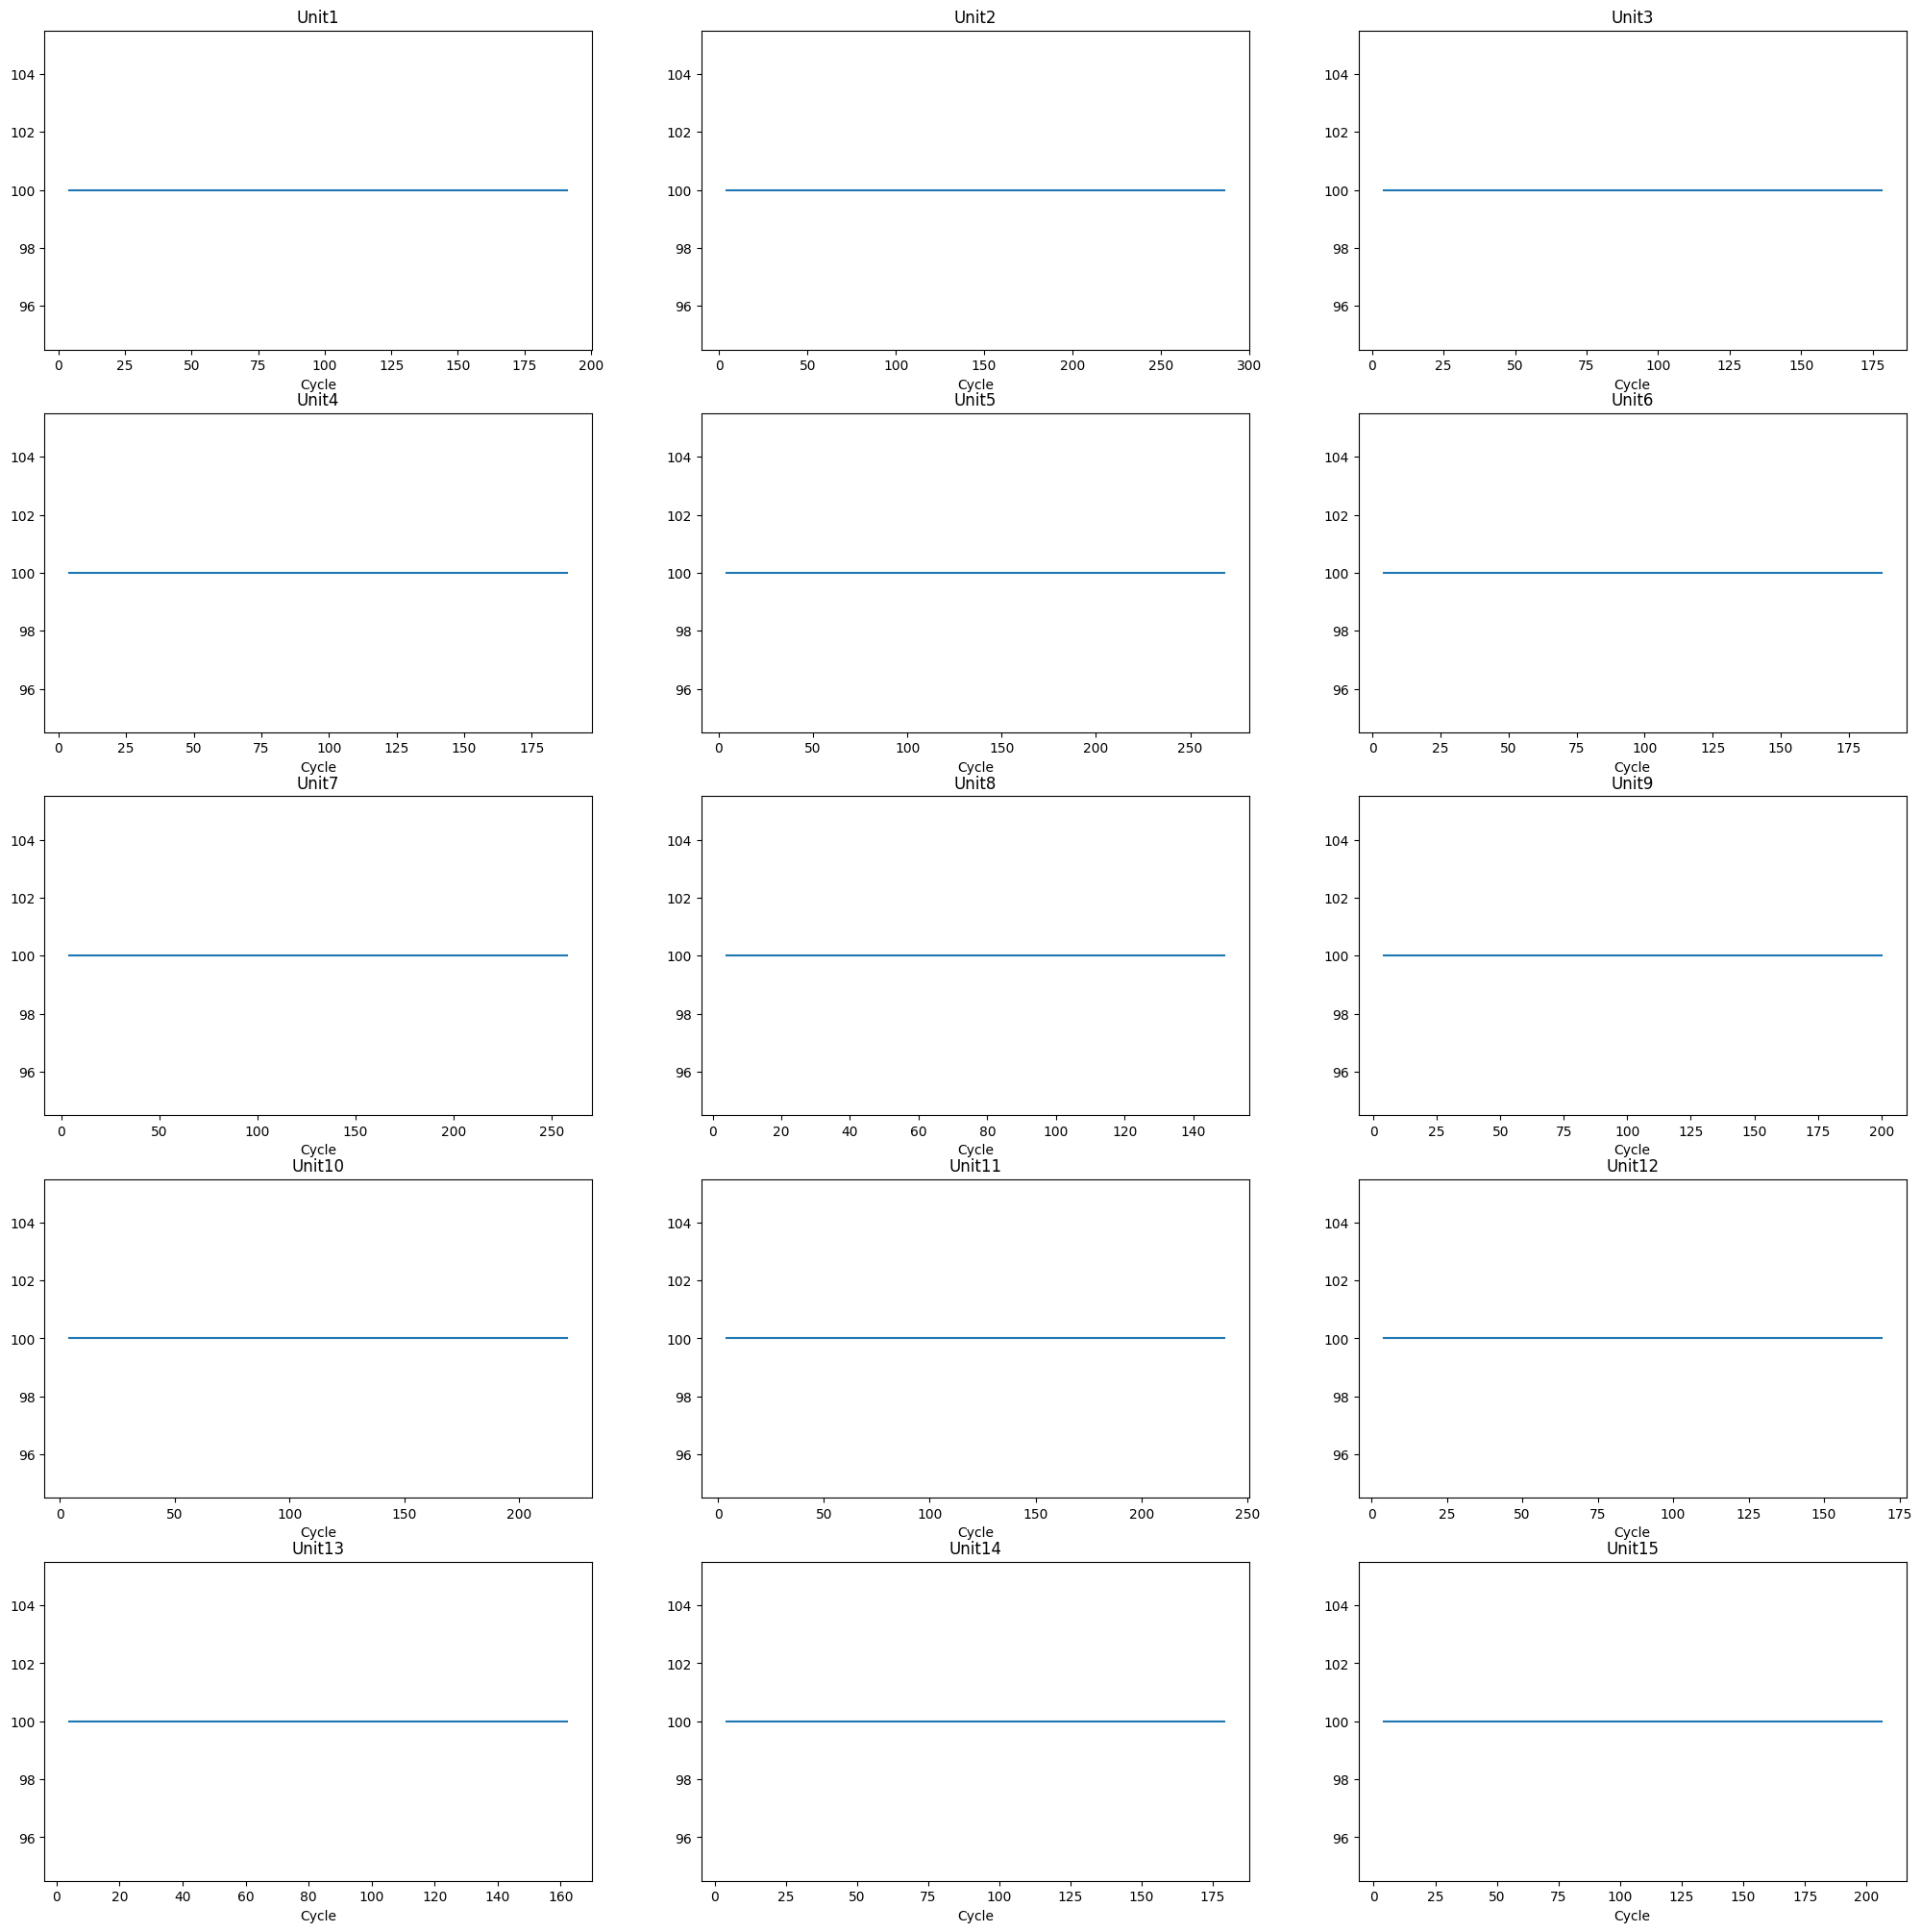

In [13]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (25,25))

ax = axes.ravel()

for i in range(0,15):
    temp = df.setting_3[df.unit == i+1].reset_index(drop = True).rolling(window = 5).mean()
    temp.plot(kind = "line", ax = ax[i])
    ax[i].set_title('Unit'+str(i+1))
    ax[i].set_xlabel("Cycle")

In [15]:
operation_settings3 = df.groupby('unit')['setting_3'].std()
operation_settings3.head(10)

unit
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: setting_3, dtype: float64

**Operation Setting 3 has no impact on sensor variation and therefore this feature can be dropped**

In [19]:
sensors = df.groupby('unit').std()
sensors.sum(axis=0)==0


time_cycle    False
setting_1     False
setting_2     False
setting_3      True
S1             True
S2            False
S3            False
S4            False
S5             True
S6            False
S7            False
S8            False
S9            False
S10            True
S11           False
S12           False
S13           False
S14           False
S15           False
S16            True
S17           False
S18            True
S19            True
S20           False
S21           False
RUL           False
dtype: bool

We can see sensors S1,S5,S10,S16,S18,S19 has no variation indicating that these sensors have no impact on RUL and hence can be dropped 

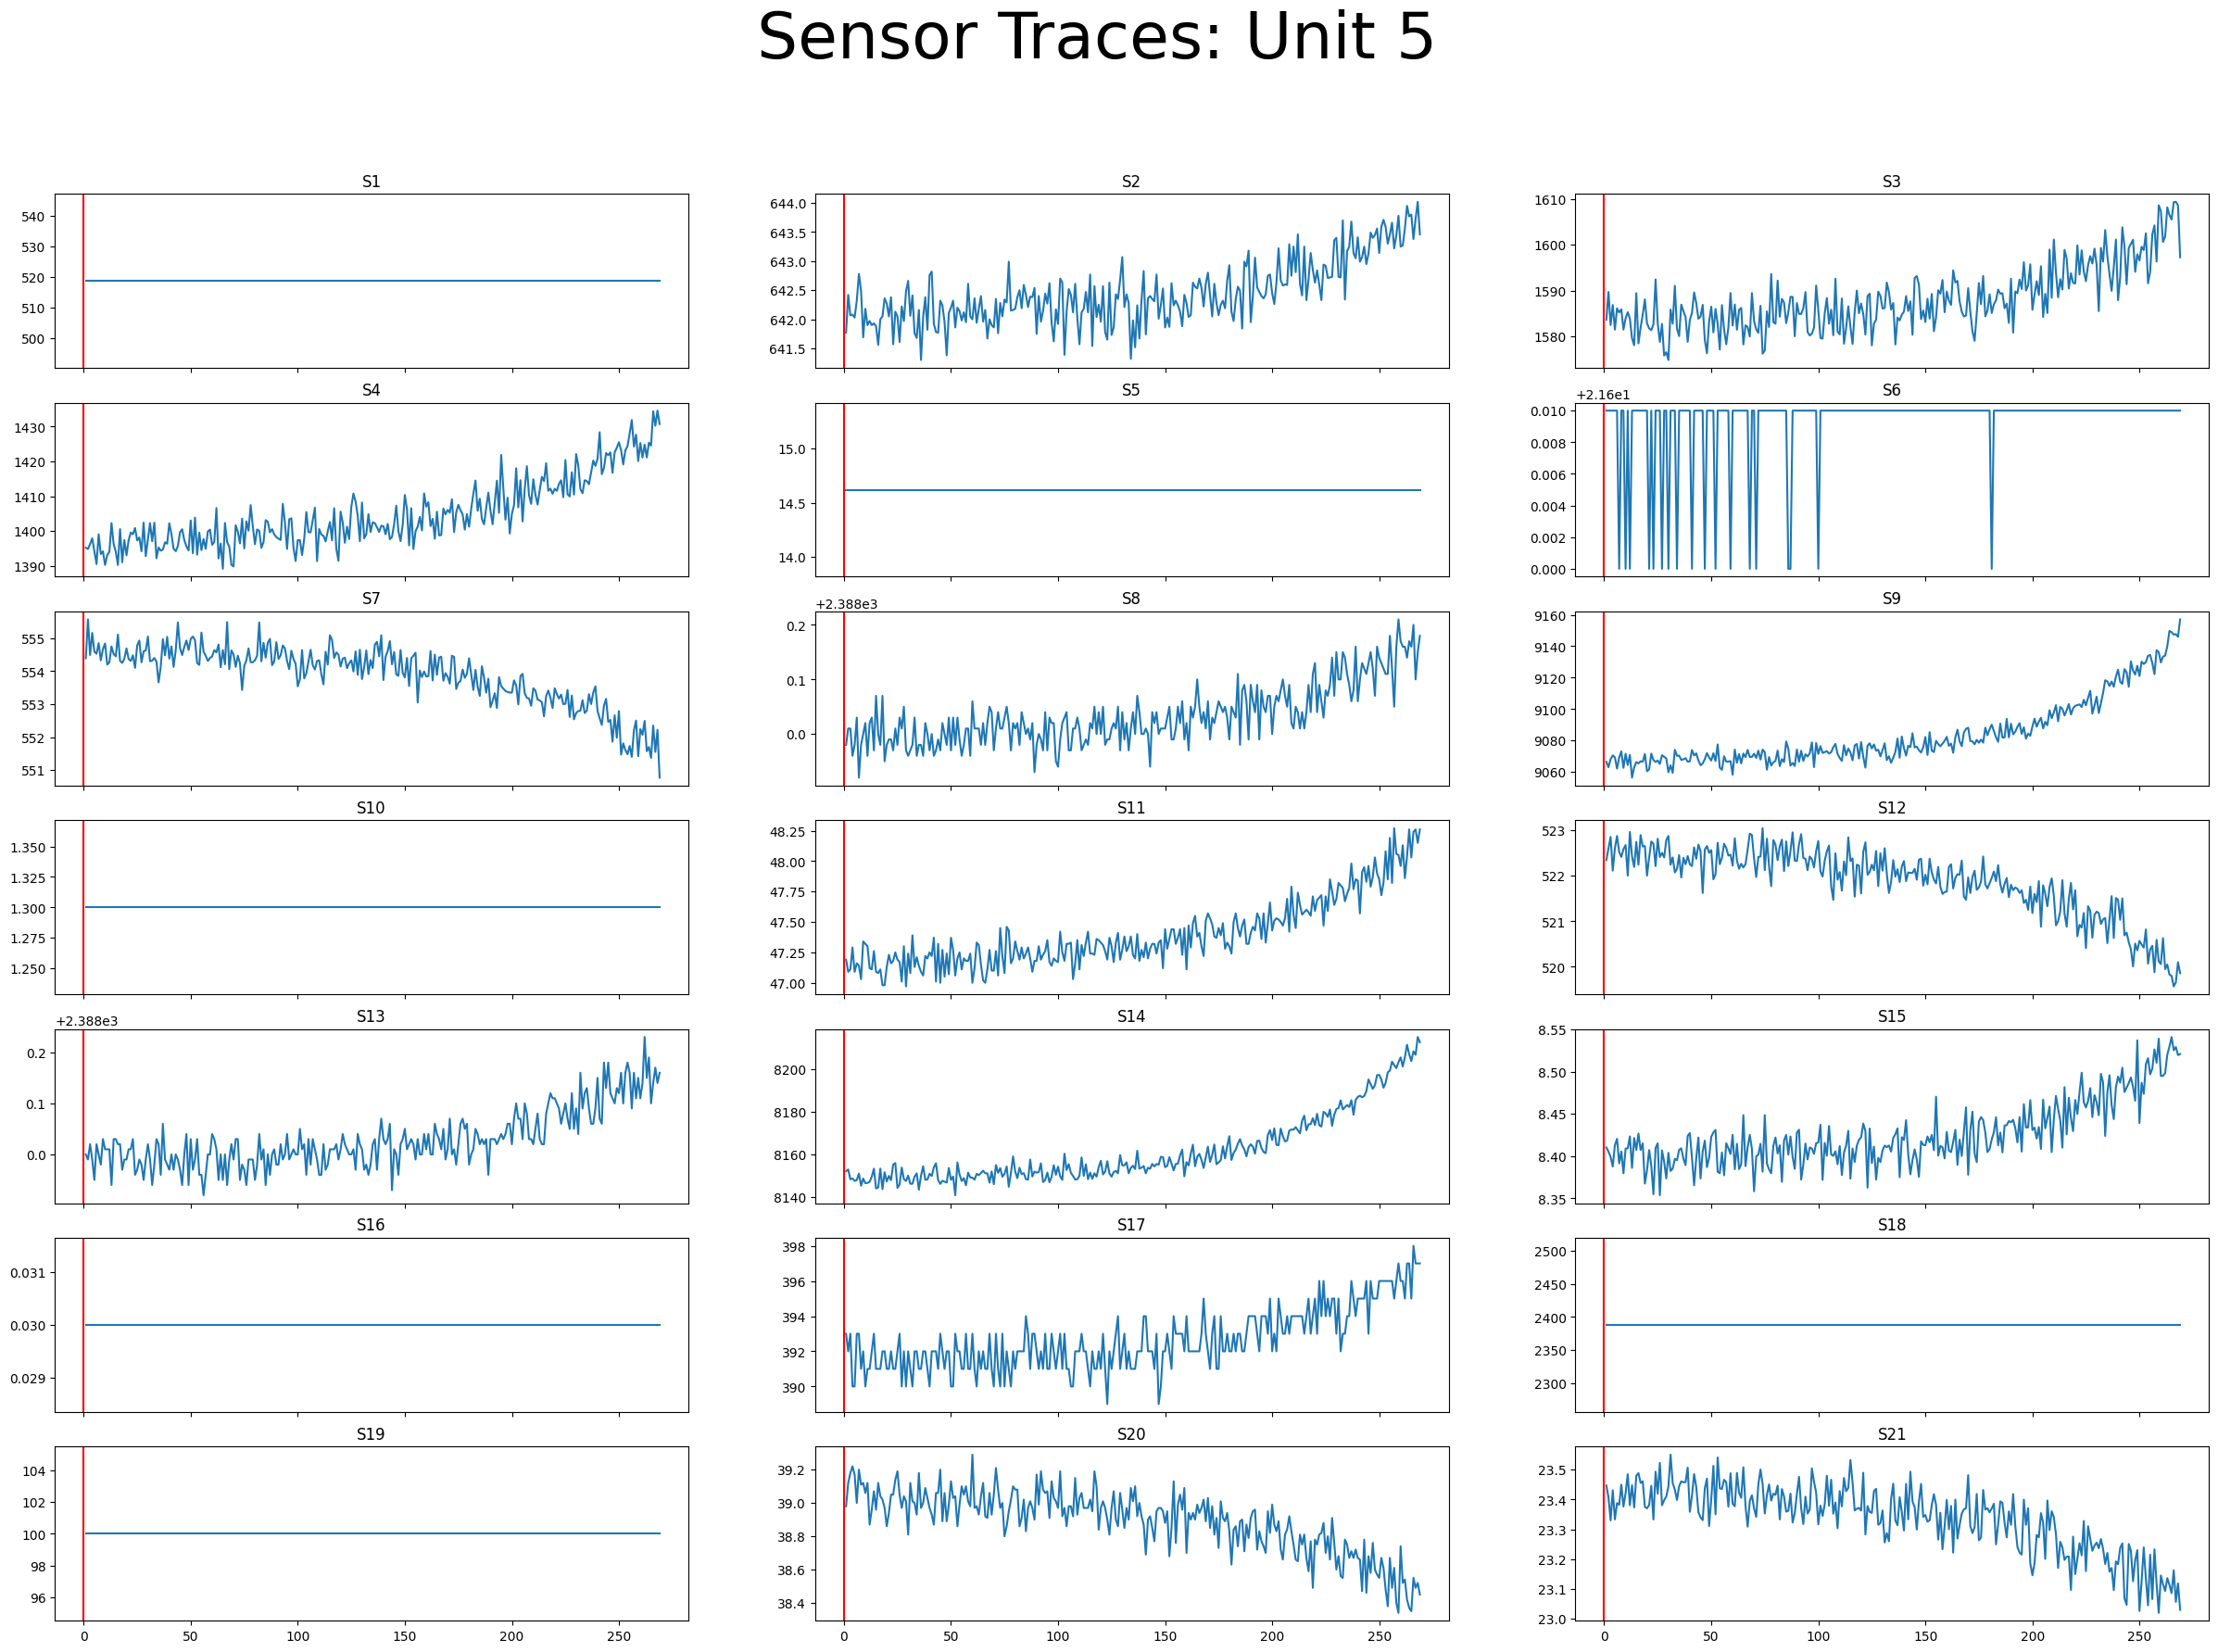

In [20]:
fig,ax=plt.subplots(7,3,figsize=(30,20),sharex=True)
df_query=df.query('unit==5')
c=0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].plot(df_query.time_cycle.values, df_query['S'+str(c+1)])
        ax[i,j].set_title('S'+str(c+1))
        ax[i,j].axvline(0,c='r')
        c+=1
plt.suptitle('Sensor Traces: Unit 5',fontsize=50)
plt.show()



S1,S5,S6,S10,S16,S18,S19 are constant features and can be dropped<br>
Note: Sensor Measure 6 remains almost constant as well with some minor fluctuations and we can remove it as well.

In [23]:
dropped_features = ['setting_3','S1','S5','S6','S10','S16','S18','S19']

df_final = [x for x in df.columns if x not in dropped_features ]
df_final

['unit',
 'time_cycle',
 'setting_1',
 'setting_2',
 'S2',
 'S3',
 'S4',
 'S7',
 'S8',
 'S9',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S17',
 'S20',
 'S21',
 'RUL']

# Correlation Analysis

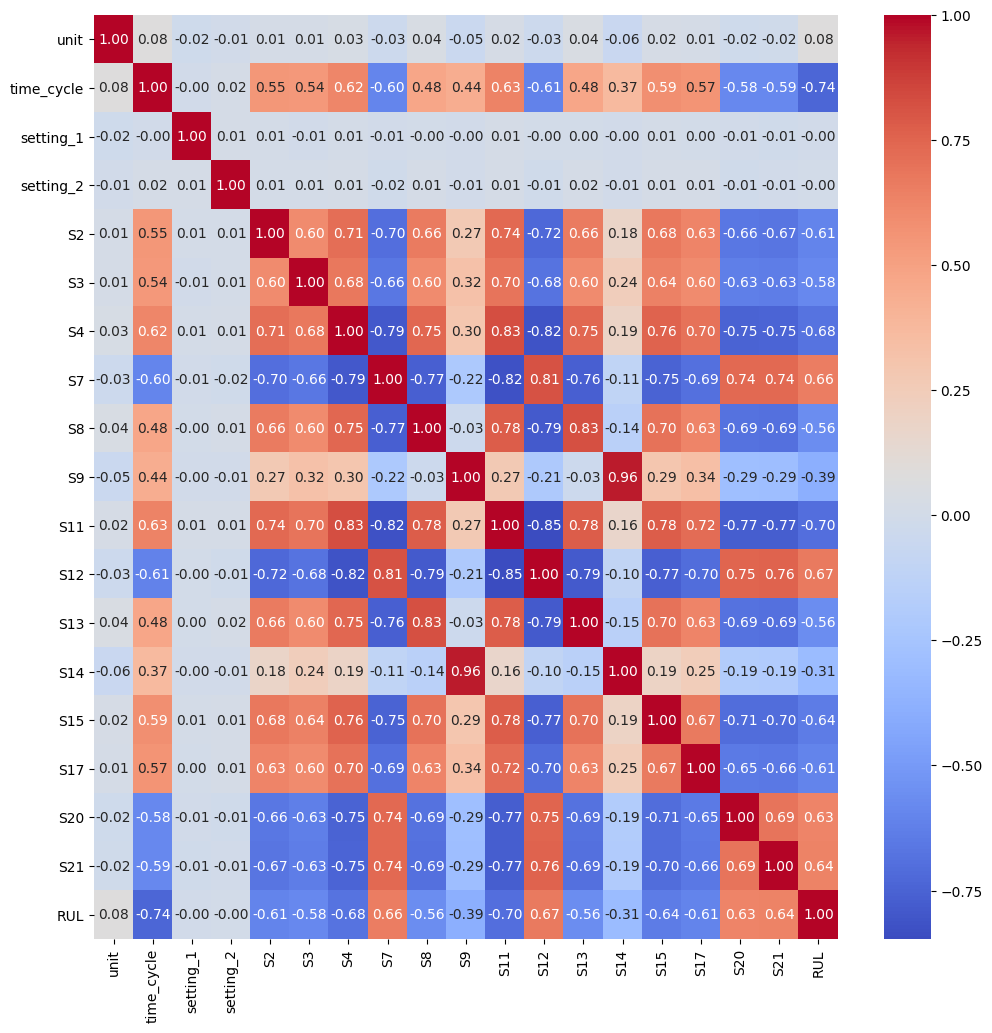

In [24]:
corr = df[df_final].corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax = sns.heatmap(corr, annot=True, cmap = "coolwarm", fmt=".2f")

We see a strong correlation between Sensor S9 and S14 and hence we can drop one of them

In [26]:
df_final = [x for x in df_final if 'S14' not in x]
df_final

['unit',
 'time_cycle',
 'setting_1',
 'setting_2',
 'S2',
 'S3',
 'S4',
 'S7',
 'S8',
 'S9',
 'S11',
 'S12',
 'S13',
 'S15',
 'S17',
 'S20',
 'S21',
 'RUL']

In [36]:
df_finzlize = df[df_final]
df_finzlize.head()

,unit,time_cycle,setting_1,setting_2,S2,S3,S4,S7,S8,S9,S11,S12,S13,S15,S17,S20,S21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
